<h3>Support Vector Machine</h3>

***Type 1:Linear Support Vector Machine***

In [18]:
import pandas as pd 
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df["Target"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
df[df.Target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [160]:
df["Flower_name"]=df.Target.apply(lambda x: iris.target_names[x])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


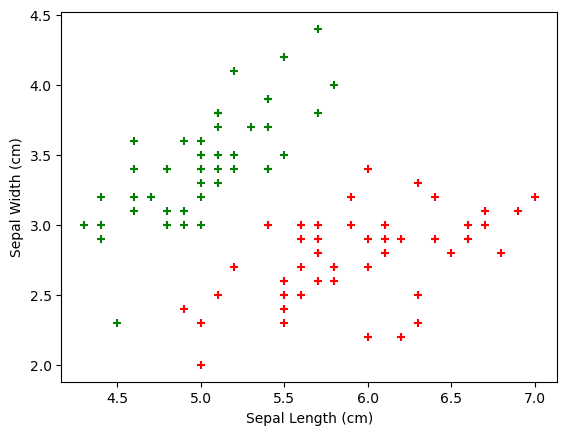

In [89]:
import matplotlib.pyplot as plt
df0=df[df.Target==0]
df1=df[df.Target==1]
df2=df[df.Target==2]

#Visualization
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color='g',marker="+")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color='r',marker="+")

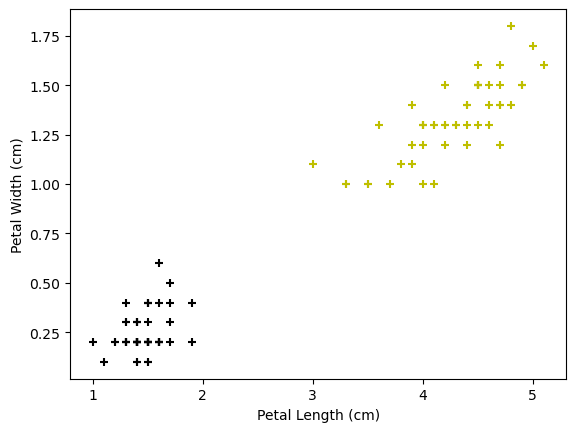

In [91]:
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color='k',marker="+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color='y',marker="+")

In [156]:
from sklearn.model_selection import train_test_split
x=df.drop(["Flower_name","Target"],axis="columns")
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [154]:
y=df.Target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.svm import SVC
model=SVC(kernel="linear")
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [162]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Try different kernels
kernels = ['linear', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy with kernel='{kernel}': {accuracy_score(y_test, y_pred):.4f}")

# 2. Tune C and gamma using GridSearchCV on rbf kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best estimator evaluation
best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)
print("\nBest Parameters:", grid.best_params_)
print(f"Best Accuracy after tuning: {accuracy_score(y_test, best_pred):.4f}")


Accuracy with kernel='linear': 0.9778
Accuracy with kernel='rbf': 0.9861

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Accuracy after tuning: 0.9889
